<a href="https://colab.research.google.com/github/tezz-io/ds_lab/blob/main/StatisticsDistributionsOfTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Box plot of word count
# 2. POS tagging
# 3. Non-english tagging

## Summary statistics, Distributions and Visualization

### Word Frequency table.

In [ ]:
# Download the dataset
!rm -rf cleaned_tweets48.csv
!wget https://media.githubusercontent.com/media/tezz-io/ds_lab/main/output/cleaned_tweets48.csv

--2021-11-10 10:46:07--  https://media.githubusercontent.com/media/tezz-io/ds_lab/main/output/cleaned_tweets48.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21100294 (20M) [text/plain]
Saving to: ‘cleaned_tweets48.csv’

cleaned_tweets48.cs 100%[===================>]  20.12M   125MB/s    in 0.2s    

2021-11-10 10:46:08 (125 MB/s) - ‘cleaned_tweets48.csv’ saved [21100294/21100294]



In [ ]:
# Load the dataset
import pandas as pd
df = pd.read_csv( 'cleaned_tweets48.csv')

In [ ]:
# Preview the dataset
df.head()

,Unnamed: 0,id,date,content
0,1452749734716661762,1452749734716661762,2021-10-24,mannkibaat via namo app
1,1452725732002697219,1452725732002697219,2021-10-24,mannkibaat pmmodi mygovindia stand india gover...
2,1452720861367078912,1452720861367078912,2021-10-24,local mannkibaat httpstcoagncronqjh
3,1452720388371357699,1452720388371357699,2021-10-24,javedmansari langamahesh nobody bjp would want...
4,1452713887451607044,1452713887451607044,2021-10-24,listened hon pm shrinarendramodi ji mannkibaat...


In [ ]:
df = df.drop('Unnamed: 0', 1)

In [ ]:
df.head()

,id,date,content
0,1452749734716661762,2021-10-24,mannkibaat via namo app
1,1452725732002697219,2021-10-24,mannkibaat pmmodi mygovindia stand india gover...
2,1452720861367078912,2021-10-24,local mannkibaat httpstcoagncronqjh
3,1452720388371357699,2021-10-24,javedmansari langamahesh nobody bjp would want...
4,1452713887451607044,2021-10-24,listened hon pm shrinarendramodi ji mannkibaat...


In [ ]:
def remove_newlines_tabs_multispaces( string ):
  new_string = ""
  for i in string:
    if i != '\n':
      new_string += i
    else:
      new_string += ' '
  
  string = ""
  for i in new_string:
    if i != '\t':
      string += i
    else:
      string += ' '
  
  new_string = ""
  for i in range(len(string)-1):
    if( string[i] != ' ' ):
      new_string += string[i]
    else:
      if string[i+1] == ' ':
        continue
      else:
        new_string += string[i]
  return new_string

In [ ]:
def word_frequency_table( paragraph ):
  paragraph = remove_newlines_tabs_multispaces( paragraph )
  words = paragraph.strip().split(' ')
  wft = {}
  to_remove = ["mannkibaat", "narendramodi", "pm", "modi", "via", "app", "namo", "amp", "rt", "ji", "ki"]
  for i in words:
    if i in to_remove:
      continue
    if "http" in i:
      continue
    if i in wft.keys():
      wft[i] += 1
    else:
      wft[i] = 1
  
  df = pd.DataFrame()
  df = pd.DataFrame.from_dict(wft, orient='index')
  return df

In [ ]:
paragraph = ""
for i, r in df.iterrows():
  paragraph += " " + r['content']

In [ ]:
wft = word_frequency_table(paragraph)
wft.columns = ['count']
wft = wft.sort_values(by=['count'], ascending=False)
wft

,count
india,16058
pmoindia,11720
people,5935
narendra,4950
baat,4581
...,...
typenoof,1
jaybhadrakali,1
wordsslay,1
usake,1


In [ ]:
wft15 = wft.head(30)
wft15

,count
india,16058
pmoindia,11720
people,5935
narendra,4950
baat,4581
today,4249
world,3911
mann,3596
nation,3569
country,3544


### Plotting the Twitter word count

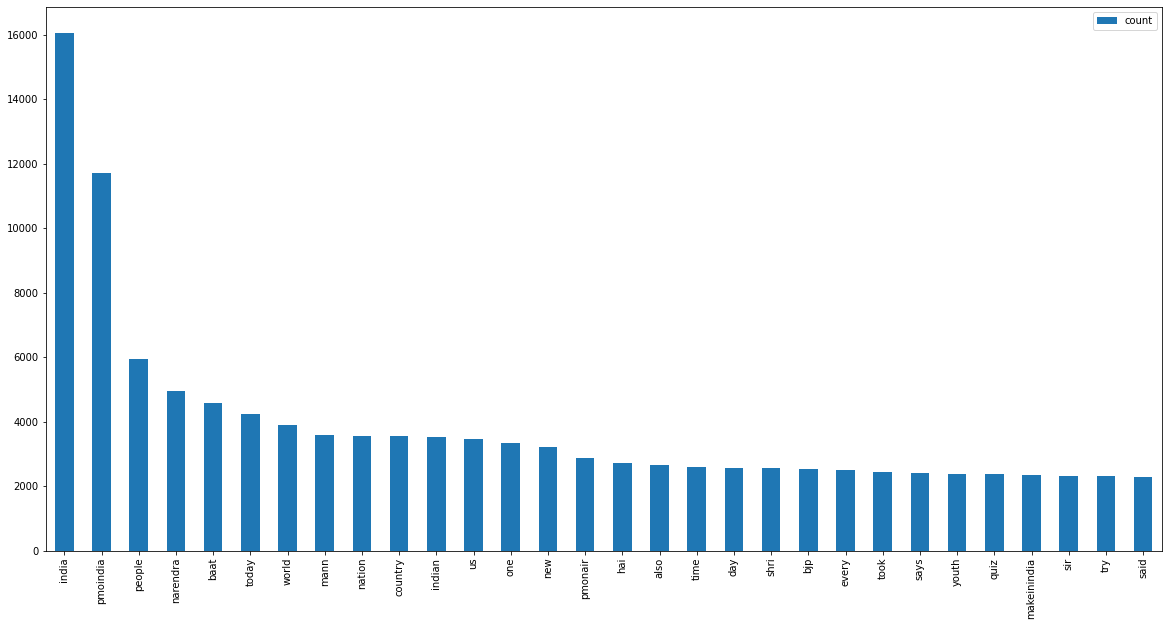

In [ ]:
import matplotlib.pyplot as plt
wft15.plot.bar(figsize=(20,10))